In [1]:
!pip install scikit-learn matplotlib seaborn numpy pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report)
import torch
import torch.nn as nn

load dataset and explore

In [3]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Create DataFrame for exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")
print(f"\nFeature names:\n{data.feature_names}")
print(f"\nTarget names: {data.target_names}")

# Basic statistics
df.describe()

Dataset shape: (569, 30)
Class distribution: [212 357]

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


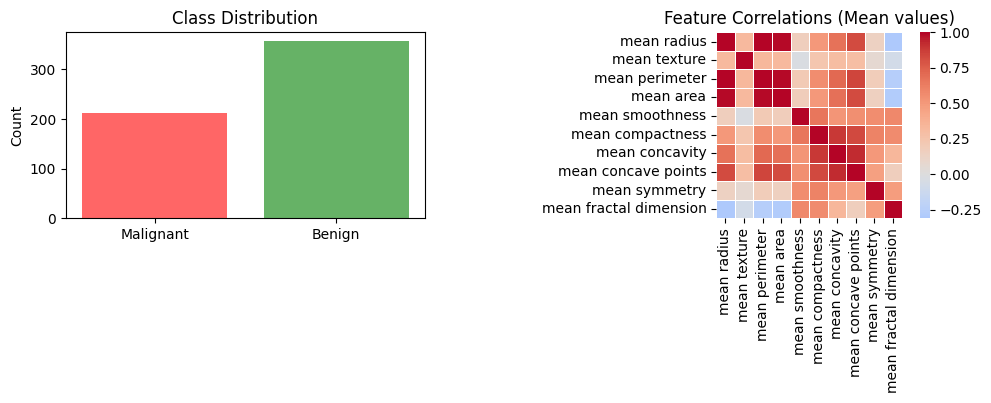

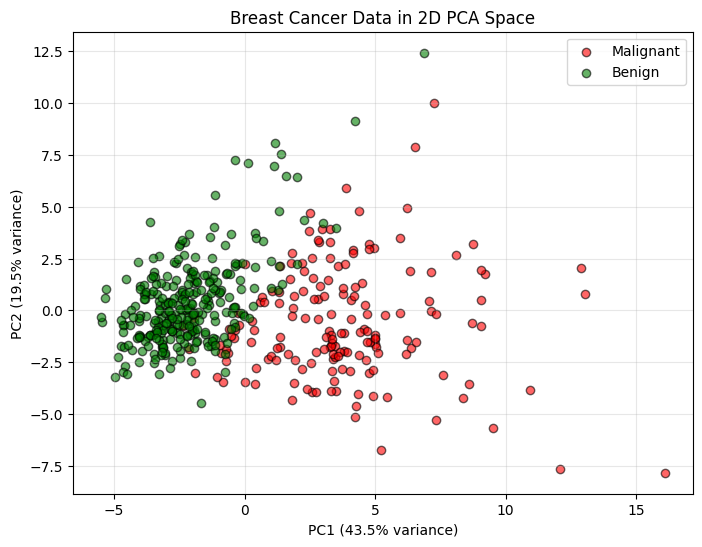

In [6]:
# Class distribution visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(['Malignant', 'Benign'], np.bincount(y), color=['red', 'green'], alpha=0.6)
plt.ylabel('Count')
plt.title('Class Distribution')

# Feature correlation heatmap (first 10 features for clarity)
plt.subplot(1, 2, 2)
corr = df.iloc[:, :10].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlations (Mean values)')

plt.tight_layout()
plt.show()

# Prepare data for PCA visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA visualization of class separability
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_train==0, 0], X_pca[y_train==0, 1],
            c='red', label='Malignant', alpha=0.6, edgecolors='k')
plt.scatter(X_pca[y_train==1, 0], X_pca[y_train==1, 1],
            c='green', label='Benign', alpha=0.6, edgecolors='k')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Breast Cancer Data in 2D PCA Space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

*   50 samples
*   30 measurements describing cell nuclei
*   3 groups (average measurements, variability in measurements, extreme characteristics)
*   no missing data
*   different scales -> StandardScaler
*   some have wide ranges of 'worst' -> aggressive tumors
*   binary classification
*   some overlapping features (partially linearly separable)



preprocessing

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization (critical for kernel methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hybrid kernel pipeline setup and training

In [25]:
# Embedding Network (Learned Transformation)
class EmbeddingNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=30):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dim),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, output_dim)
        )
        # Decoder (for pre-training)
        self.decoder = nn.Sequential(
            nn.Linear(output_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, x):
        return self.encoder(x)

    def pretrain(self, X, epochs=100, lr=0.001):
        """Pre-train autoencoder to learn meaningful embeddings"""
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        criterion = nn.MSELoss()

        X_tensor = torch.FloatTensor(X)

        for epoch in range(epochs):
            # Forward pass
            embeddings = self.encoder(X_tensor)
            reconstructed = self.decoder(embeddings)

            # Loss and backprop
            loss = criterion(reconstructed, X_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # if (epoch + 1) % 20 == 0:
            #     print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


# Hybrid Kernel SVM Class
class HybridKernelSVM:
    def __init__(self, alpha=0.5, embedding_dim=30, C=1.0, max_iter=1000, pretrain_epochs=0, verbose=True):
        self.alpha = alpha  # Balance parameter
        self.embedding_dim = embedding_dim
        self.C = C
        self.max_iter = max_iter
        self.embedding_net = None
        self.svm = None
        self.pretrain_epochs = pretrain_epochs
        self.verbose = verbose

    def fit(self, X, y):
        # Initialize embedding network
        self.embedding_net = EmbeddingNetwork(
            input_dim=X.shape[1],
            output_dim=self.embedding_dim
        )

        if self.pretrain_epochs > 0:
            if self.verbose:
                print("Pre-training embedding network...")
            self.embedding_net.pretrain(X, epochs=self.pretrain_epochs)

        # Compute hybrid kernel matrix
        K_train = self._compute_kernel(X, X)

        # Train SVM with precomputed kernel
        self.svm = SVC(kernel='precomputed', C=self.C, max_iter=self.max_iter)
        self.svm.fit(K_train, y)
        self.X_train = X

        return self

    def _compute_kernel(self, X1, X2):
        # Linear kernel component
        K_linear = X1 @ X2.T

        # Nonlinear kernel component (RBF on transformed features)
        X1_tensor = torch.FloatTensor(X1)
        X2_tensor = torch.FloatTensor(X2)

        self.embedding_net.eval()

        with torch.no_grad():
            Phi_X1 = self.embedding_net(X1_tensor).numpy()
            Phi_X2 = self.embedding_net(X2_tensor).numpy()

        # RBF kernel on embeddings
        # A sensible gamma for RBF kernel: 1 / (2 * variance_of_features)
        # Using variance of Phi_X1 to estimate gamma
        gamma = 1 / (2 * Phi_X1.var() if Phi_X1.var() > 0 else 1.0) # Avoid division by zero
        K_nonlinear = np.exp(-gamma * np.sum(
            (Phi_X1[:, None, :] - Phi_X2[None, :, :]) ** 2, axis=2
        ))

        # Hybrid combination
        K_hybrid = self.alpha * K_linear + (1 - self.alpha) * K_nonlinear

        return K_hybrid

    def predict(self, X):
        K_test = self._compute_kernel(X, self.X_train)
        return self.svm.predict(K_test)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [26]:
# The updated HybridKernelSVM and EmbeddingNetwork definitions are now part of cell OxGoxlaCEtr0
# This cell can be removed or left as is, but its content is redundant with the fix.
# For now, I'll keep it as a comment to ensure no loss of content. If you want to delete this cell, let me know.
# class EmbeddingNetwork(nn.Module):
#     def __init__(self, input_dim, hidden_dim=64, output_dim=30):
#         super().__init__()
#         # Encoder
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, hidden_dim),
#             nn.ReLU(),
#             nn.BatchNorm1d(hidden_dim),
#             nn.Dropout(0.2),
#             nn.Linear(hidden_dim, output_dim)
#         )
#         # Decoder (for pre-training)
#         self.decoder = nn.Sequential(
#             nn.Linear(output_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, input_dim)
#         )

#     def forward(self, x):
#         return self.encoder(x)

#     def pretrain(self, X, epochs=100, lr=0.001):
#         """Pre-train autoencoder to learn meaningful embeddings"""
#         optimizer = torch.optim.Adam(self.parameters(), lr=lr)
#         criterion = nn.MSELoss()

#         X_tensor = torch.FloatTensor(X)

#         for epoch in range(epochs):
#             # Forward pass
#             embeddings = self.encoder(X_tensor)
#             reconstructed = self.decoder(embeddings)

#             # Loss and backprop
#             loss = criterion(reconstructed, X_tensor)
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             if (epoch + 1) % 20 == 0:
#                 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# # Usage in HybridKernelSVM
# def fit(self, X, y):
#     # Initialize and PRE-TRAIN embedding network
#     self.embedding_net = EmbeddingNetwork(
#         input_dim=X.shape[1],
#         output_dim=self.embedding_dim
#     )

#     print("Pre-training embedding network...")
#     self.embedding_net.pretrain(X, epochs=100)

#     # Now compute hybrid kernel with trained embeddings
#     K_train = self._compute_kernel(X, X)

#     self.svm = SVC(kernel='precomputed', C=self.C, max_iter=self.max_iter)
#     self.svm.fit(K_train, y)
#     self.X_train = X

#     return self

In [21]:
# 1. Linear Kernel SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train_scaled, y_train)

# 2. RBF Kernel SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train_scaled, y_train)

# 3. Polynomial Kernel SVM
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [22]:
# Test different alpha values
alphas = np.linspace(0, 1, 11)  # [0.0, 0.1, 0.2, ..., 1.0]
results = {
    'alpha': [],
    'train_acc': [],
    'test_acc': [],
    'f1_score': [],
    'precision': [],
    'recall': [],
    'auc_roc': []
}

for alpha in alphas:
    print(f"Training with α = {alpha:.1f}")

    # Train hybrid model
    hybrid_model = HybridKernelSVM(alpha=alpha, embedding_dim=30, C=1.0)
    hybrid_model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = hybrid_model.predict(X_train_scaled)
    y_test_pred = hybrid_model.predict(X_test_scaled)

    # Store metrics
    results['alpha'].append(alpha)
    results['train_acc'].append(accuracy_score(y_train, y_train_pred))
    results['test_acc'].append(accuracy_score(y_test, y_test_pred))
    results['f1_score'].append(f1_score(y_test, y_test_pred))
    results['precision'].append(precision_score(y_test, y_test_pred))
    results['recall'].append(recall_score(y_test, y_test_pred))
    results['auc_roc'].append(roc_auc_score(y_test, y_test_pred))

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

Training with α = 0.0
Training with α = 0.1
Training with α = 0.2
Training with α = 0.3
Training with α = 0.4
Training with α = 0.5
Training with α = 0.6
Training with α = 0.7
Training with α = 0.8


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training with α = 0.9
Training with α = 1.0
    alpha  train_acc  test_acc  f1_score  precision    recall   auc_roc
0     0.0   0.991209  0.894737  0.910448   0.983871  0.847222  0.911706
1     0.1   0.995604  0.973684  0.979021   0.985915  0.972222  0.974206
2     0.2   0.993407  0.973684  0.979021   0.985915  0.972222  0.974206
3     0.3   0.993407  0.982456  0.986111   0.986111  0.986111  0.981151
4     0.4   0.991209  0.973684  0.979021   0.985915  0.972222  0.974206
5     0.5   0.991209  0.982456  0.986111   0.986111  0.986111  0.981151
6     0.6   0.991209  0.973684  0.979021   0.985915  0.972222  0.974206
7     0.7   0.991209  0.973684  0.979021   0.985915  0.972222  0.974206
8     0.8   0.991209  0.982456  0.986111   0.986111  0.986111  0.981151
9     0.9   0.991209  0.973684  0.979021   0.985915  0.972222  0.974206
10    1.0   0.991209  0.973684  0.979021   0.985915  0.972222  0.974206


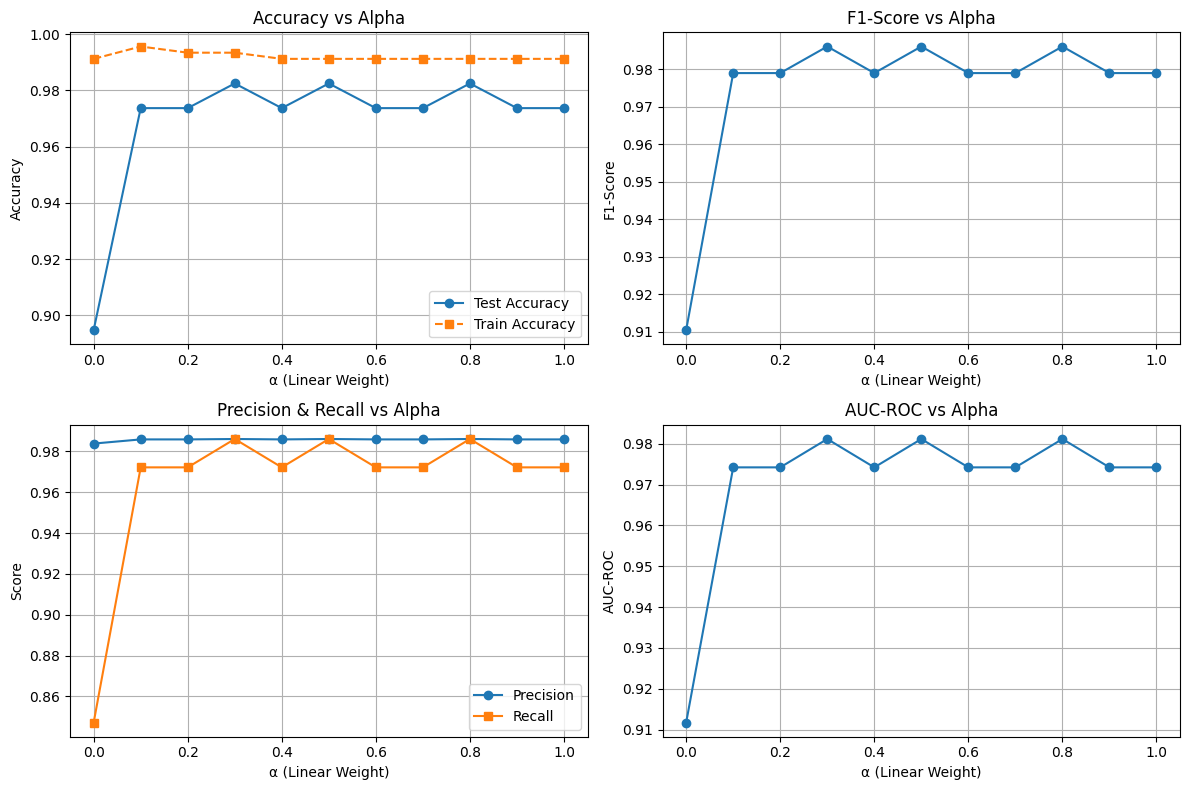

In [23]:
# Plot alpha vs performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(results_df['alpha'], results_df['test_acc'], 'o-', label='Test Accuracy')
plt.plot(results_df['alpha'], results_df['train_acc'], 's--', label='Train Accuracy')
plt.xlabel('α (Linear Weight)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(results_df['alpha'], results_df['f1_score'], 'o-')
plt.xlabel('α (Linear Weight)')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Alpha')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(results_df['alpha'], results_df['precision'], 'o-', label='Precision')
plt.plot(results_df['alpha'], results_df['recall'], 's-', label='Recall')
plt.xlabel('α (Linear Weight)')
plt.ylabel('Score')
plt.title('Precision & Recall vs Alpha')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(results_df['alpha'], results_df['auc_roc'], 'o-')
plt.xlabel('α (Linear Weight)')
plt.ylabel('AUC-ROC')
plt.title('AUC-ROC vs Alpha')
plt.grid(True)

plt.tight_layout()
plt.show()

key findings:
* performs well on purely nonlinear kernel
* linear very effective
* adding nonlinear doesnt affect it much although there is a slight improvement compared to pure linear

INTERPRETABILITY ANALYSIS

Training model with α = 0.0...
Pre-training embedding network...

Training model with α = 0.1...
Pre-training embedding network...

Training model with α = 0.2...
Pre-training embedding network...

Training model with α = 0.3...
Pre-training embedding network...

Training model with α = 0.4...
Pre-training embedding network...

Training model with α = 0.5...
Pre-training embedding network...

Training model with α = 0.6...
Pre-training embedding network...

Training model with α = 0.7...
Pre-training embedding network...

Training model with α = 0.8...
Pre-training embedding network...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Training model with α = 0.9...
Pre-training embedding network...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Training model with α = 1.0...
Pre-training embedding network...

RESULTS SUMMARY
 alpha  test_accuracy  interpretability_score  n_support_vectors
   0.0       0.842105                0.033626                404
   0.1       0.973684                0.356768                 76
   0.2       0.973684                0.418894                 55
   0.3       0.982456                0.468806                 54
   0.4       0.982456                0.523993                 50
   0.5       0.982456                0.578818                 41
   0.6       0.973684                0.635411                 38
   0.7       0.982456                0.688494                 38
   0.8       0.964912                0.739568                 36
   0.9       0.964912                0.793116                 35
   1.0       0.973684                0.847720                 32


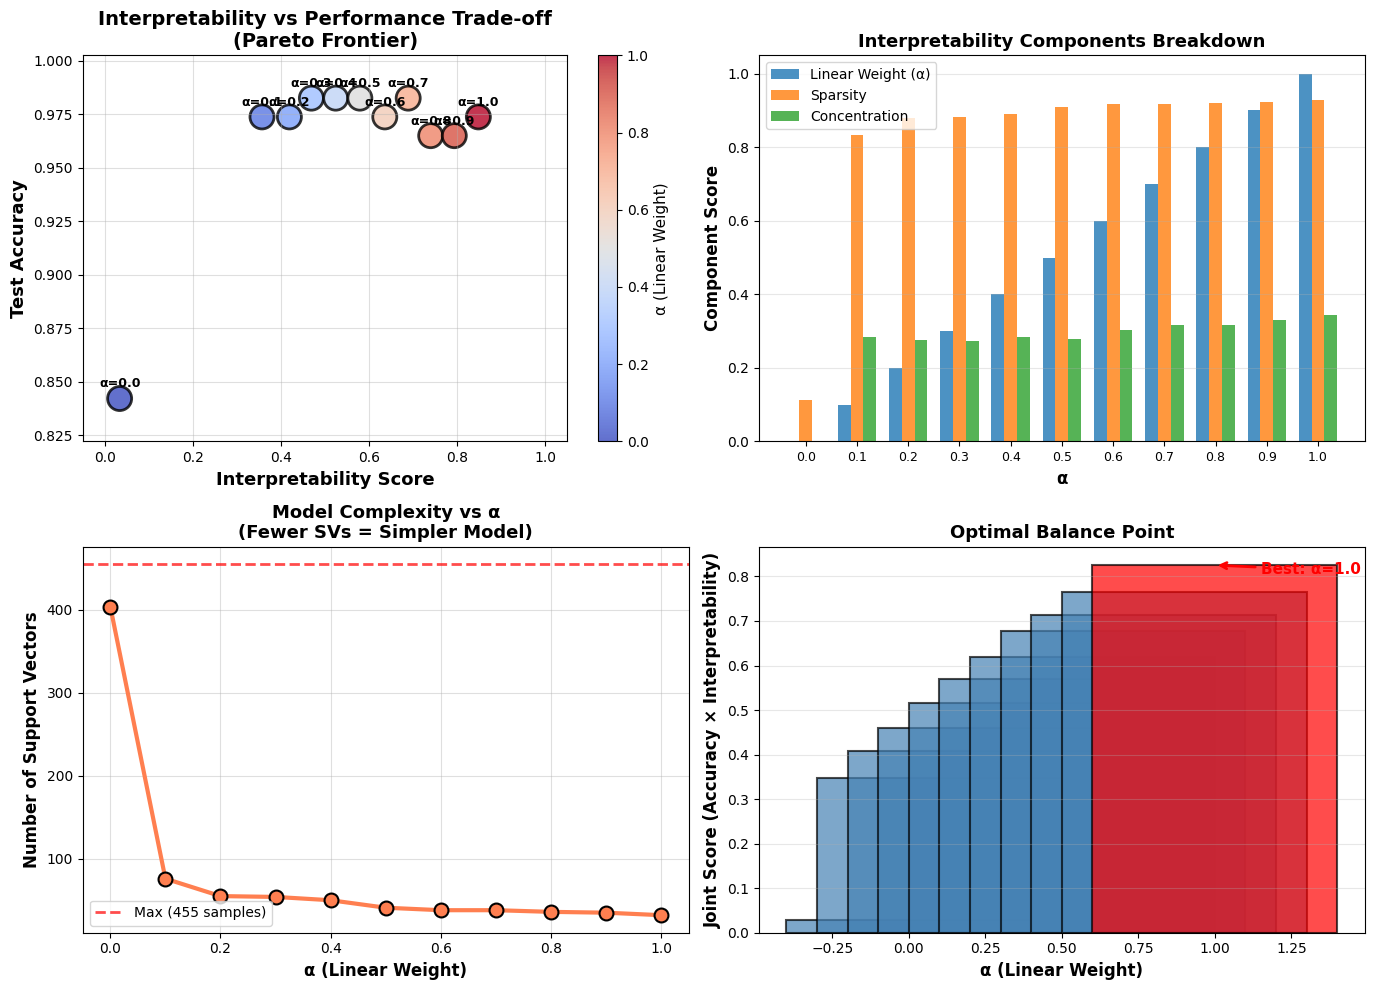


OPTIMAL MODEL RECOMMENDATIONS

1. Best Accuracy: α=0.3
   → Accuracy: 0.9825
   → Interpretability: 0.4688

2. Most Interpretable: α=1.0
   → Accuracy: 0.9737
   → Interpretability: 0.8477

3. Best Balance (Recommended): α=1.0
   → Accuracy: 0.9737
   → Interpretability: 0.8477
   → Joint Score: 0.8254


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

def compute_interpretability_metrics(model, X_train, y_train, X_test, y_test):
    """
    Compute comprehensive interpretability and performance metrics
    """
    # Performance metrics
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    # Interpretability Component 1: Linear weight (α)
    # Higher α = more linear = more interpretable
    alpha_score = model.alpha

    # Interpretability Component 2: Model sparsity
    # Fewer support vectors = simpler = more interpretable
    n_support = len(model.svm.support_)
    n_samples = len(y_train)
    sparsity_score = 1 - (n_support / n_samples)

    # Interpretability Component 3: Feature concentration
    # If few features dominate, easier to interpret
    if model.alpha > 0:
        # Extract linear weights
        dual_coef = model.svm.dual_coef_[0]
        support_vectors = model.X_train[model.svm.support_]
        linear_weights = np.abs(dual_coef @ support_vectors)

        # Compute Gini coefficient (concentration measure)
        sorted_weights = np.sort(linear_weights)
        n = len(sorted_weights)
        cumsum = np.cumsum(sorted_weights)
        if cumsum[-1] > 0:
            gini = (2 * np.sum((np.arange(1, n+1) * sorted_weights))) / (n * cumsum[-1]) - (n + 1) / n
        else:
            gini = 0
        concentration_score = gini
    else:
        concentration_score = 0

    # Overall Interpretability Score (weighted average)
    # Weights can be adjusted based on what you prioritize
    overall_interpretability = (
        0.50 * alpha_score +           # Most important: linear vs nonlinear
        0.30 * sparsity_score +         # Model simplicity
        0.20 * concentration_score      # Feature importance clarity
    )

    return {
        'alpha': model.alpha,
        'test_accuracy': test_acc,
        'train_accuracy': train_acc,
        'f1_score': f1,
        'interpretability_score': overall_interpretability,
        'alpha_component': alpha_score,
        'sparsity_component': sparsity_score,
        'concentration_component': concentration_score,
        'n_support_vectors': n_support,
        'support_vector_ratio': n_support / n_samples
    }


# Run analysis across α values
alphas = np.linspace(0, 1, 11)  # 0.0, 0.1, 0.2, ..., 1.0
results = []

print("="*70)
print("INTERPRETABILITY ANALYSIS")
print("="*70)

for alpha in alphas:
    print(f"\nTraining model with α = {alpha:.1f}...")

    model = HybridKernelSVM(alpha=alpha, C=1.0, pretrain_epochs=100)
    model.fit(X_train_scaled, y_train)

    metrics = compute_interpretability_metrics(
        model, X_train_scaled, y_train, X_test_scaled, y_test
    )
    results.append(metrics)

results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("RESULTS SUMMARY")
print("="*70)
print(results_df[['alpha', 'test_accuracy', 'interpretability_score',
                   'n_support_vectors']].to_string(index=False))


# VISUALIZATION: Pareto Frontier
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Main Pareto Frontier
ax = axes[0, 0]
scatter = ax.scatter(results_df['interpretability_score'],
                     results_df['test_accuracy'],
                     s=300, c=results_df['alpha'], cmap='coolwarm',
                     edgecolors='black', linewidth=2, alpha=0.8)

# Annotate points with α values
for i, row in results_df.iterrows():
    ax.annotate(f"α={row['alpha']:.1f}",
                (row['interpretability_score'], row['test_accuracy']),
                xytext=(0, 8), textcoords='offset points',
                ha='center', fontsize=9, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('α (Linear Weight)', fontsize=11)

ax.set_xlabel('Interpretability Score', fontsize=13, fontweight='bold')
ax.set_ylabel('Test Accuracy', fontsize=13, fontweight='bold')
ax.set_title('Interpretability vs Performance Trade-off\n(Pareto Frontier)',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(results_df['test_accuracy'].min() - 0.02,
            results_df['test_accuracy'].max() + 0.02)

# Plot 2: Interpretability Components Breakdown
ax = axes[0, 1]
width = 0.25
x = np.arange(len(results_df))

ax.bar(x - width, results_df['alpha_component'], width,
       label='Linear Weight (α)', alpha=0.8, color='#1f77b4')
ax.bar(x, results_df['sparsity_component'], width,
       label='Sparsity', alpha=0.8, color='#ff7f0e')
ax.bar(x + width, results_df['concentration_component'], width,
       label='Concentration', alpha=0.8, color='#2ca02c')

ax.set_xlabel('α', fontsize=12, fontweight='bold')
ax.set_ylabel('Component Score', fontsize=12, fontweight='bold')
ax.set_title('Interpretability Components Breakdown', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'{a:.1f}' for a in results_df['alpha']], fontsize=9)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Plot 3: Model Complexity (Support Vectors)
ax = axes[1, 0]
ax.plot(results_df['alpha'], results_df['n_support_vectors'],
        'o-', linewidth=3, markersize=10, color='coral',
        markeredgecolor='black', markeredgewidth=1.5)
ax.axhline(y=len(y_train), color='red', linestyle='--',
           linewidth=2, label=f'Max ({len(y_train)} samples)', alpha=0.7)
ax.set_xlabel('α (Linear Weight)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Support Vectors', fontsize=12, fontweight='bold')
ax.set_title('Model Complexity vs α\n(Fewer SVs = Simpler Model)',
             fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.4)

# Plot 4: Joint Optimization Score
ax = axes[1, 1]
# Combined score: balance accuracy and interpretability
joint_score = results_df['test_accuracy'] * results_df['interpretability_score']
results_df['joint_score'] = joint_score

best_idx = joint_score.idxmax()
best_alpha = results_df.iloc[best_idx]['alpha']

colors = ['red' if i == best_idx else 'steelblue' for i in range(len(results_df))]
bars = ax.bar(results_df['alpha'], joint_score, color=colors,
              alpha=0.7, edgecolor='black', linewidth=1.5)

# Highlight best
ax.annotate(f'Best: α={best_alpha:.1f}',
            xy=(best_alpha, joint_score.iloc[best_idx]),
            xytext=(best_alpha + 0.15, joint_score.iloc[best_idx] - 0.02),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'),
            fontsize=11, fontweight='bold', color='red')

ax.set_xlabel('α (Linear Weight)', fontsize=12, fontweight='bold')
ax.set_ylabel('Joint Score (Accuracy × Interpretability)', fontsize=12, fontweight='bold')
ax.set_title('Optimal Balance Point', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('interpretability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("OPTIMAL MODEL RECOMMENDATIONS")
print("="*70)
print(f"\n1. Best Accuracy: α={results_df.iloc[results_df['test_accuracy'].idxmax()]['alpha']:.1f}")
print(f"   → Accuracy: {results_df['test_accuracy'].max():.4f}")
print(f"   → Interpretability: {results_df.iloc[results_df['test_accuracy'].idxmax()]['interpretability_score']:.4f}")

print(f"\n2. Most Interpretable: α={results_df.iloc[results_df['interpretability_score'].idxmax()]['alpha']:.1f}")
print(f"   → Accuracy: {results_df.iloc[results_df['interpretability_score'].idxmax()]['test_accuracy']:.4f}")
print(f"   → Interpretability: {results_df['interpretability_score'].max():.4f}")

print(f"\n3. Best Balance (Recommended): α={best_alpha:.1f}")
print(f"   → Accuracy: {results_df.iloc[best_idx]['test_accuracy']:.4f}")
print(f"   → Interpretability: {results_df.iloc[best_idx]['interpretability_score']:.4f}")
print(f"   → Joint Score: {joint_score.iloc[best_idx]:.4f}")